# Assignment A02.2 Clustering and randomisation
*This assignment is done by **HyeongKyun Kim** and **SongYi Han** - We both **equally contributed** to this work by writing our own code individually first and then compare/merge them together.*

*Task: For each dataset G, randomize it to obtain network G_rnd and explore their assortativity properties.*

1. Plot the degree distribution in double-logscale and mark with a vertical line the average degree *k* 
2. For each node, compute the clustering coefficient in the graphs *G*(denoted by *C(i)*) and *Grnd* (denoted as *Crnd(i)*)
3. Do a scatter plot of *C(i)* vs. *Crnd(i)*

**[Dataset]**

1. graph_celegansInteractomes
2. graph_AstroPh
3. graph_CondMat
4. graph_chess
5. graph_dolphins
6. graph_eu_airlines
7. graph_facebook
8. graph_florentine_families
9. graph_game_thrones
10. graph_internet
11. graph_jazz_collab
12. graph_terrorists

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Define the data and variables.

In [2]:
g_cele = nx.read_gml('data/graph_celegansInteractomes.gml')
g_astro = nx.read_gml('data/graph_AstroPh.gml')
g_condm = nx.read_gml('data/graph_CondMat.gml')
g_chess = nx.read_gml('data/graph_chess.gml')
g_dolp = nx.read_gml('data/graph_dolphins.gml')
g_air = nx.read_gml('data/graph_eu_airlines.gml')
g_faceb = nx.read_gml('data/graph_facebook.gml')
g_flofam = nx.read_gml('data/graph_florentine_families.gml')
g_gmthr = nx.read_gml('data/graph_game_thrones.gml')
g_intnt = nx.read_gml('data/graph_internet.gml')
g_jazzc = nx.read_gml('data/graph_jazz_collab.gml')
g_terrs = nx.read_gml('data/graph_terrorists.gml')

#g_cele_rdm = nx.random_reference(g_cele, 100, connectivity = False)

g_cele_rdm = nx.read_gml('data_random/graph_celegansInteractomes_random.gml')
g_astro_rdm = nx.read_gml('data_random/graph_AstroPh_random.gml')
g_condm_rdm = nx.read_gml('data_random/graph_CondMat_random.gml')
g_chess_rdm = nx.read_gml('data_random/graph_chess_random.gml')
g_dolp_rdm = nx.read_gml('data_random/graph_dolphins_random.gml')
g_air_rdm = nx.read_gml('data_random/graph_eu_airlines_random.gml')
g_faceb_rdm = nx.read_gml('data_random/graph_facebook_random.gml')
g_flofam_rdm = nx.read_gml('data_random/graph_florentine_families_random.gml')
g_gmthr_rdm = nx.read_gml('data_random/graph_game_thrones_random.gml')
g_intnt_rdm = nx.read_gml('data_random/graph_internet_random.gml')
g_jazzc_rdm = nx.read_gml('data_random/graph_jazz_collab_random.gml')
g_terrs_rdm = nx.read_gml('data_random/graph_terrorists_random.gml')


real_g = [ g_cele, g_astro, g_condm,
g_chess, g_dolp, g_air, g_faceb, g_flofam,
g_gmthr, g_intnt, g_jazzc, g_terrs
]

rdm_g = [ g_cele_rdm, g_astro_rdm, g_condm_rdm,
g_chess_rdm, g_dolp_rdm, g_air_rdm, g_faceb_rdm, g_flofam_rdm,
g_gmthr_rdm, g_intnt_rdm, g_jazzc_rdm, g_terrs_rdm
]

g_name = [
    'graph_celegansInteractomes', 'graph_AstroPh', 'graph_CondMat', 'graph_chess', 
    'graph_dolphins', 'graph_eu_airlines', 'graph_facebook', 'graph_florentine_families',
    'graph_game_thrones', 'graph_internet', 'graph_jazz_collab', 'graph_terrorists'
]



In [3]:
class find_bin_arg():

    sort_k = 0
    num_sort_k = 0
    num_bar_hist = 0

    def log (g, start_bins = 2):

        g_degrees = g.degree()
        g_k_list = [g_degrees[i] for i in g.nodes()]
        
        log_start = np.log10(min(g_k_list))
        log_end = np.log10(max(g_k_list)+1)
        
        # num_bins 30 fixed
        num_bins = 30

        g_bins = np.logspace(log_start, log_end, num_bins)
        _ = np.histogram(g_k_list, bins=g_bins, density = True)

        sort_k = set(g_k_list)
        num_sort_k = len(sort_k)
        num_bar_hist = np.count_nonzero(_[0])

        return (g_bins, list(sort_k), num_sort_k, num_bar_hist)


## ===== *ANSWER* =====

### 1. Plot the degree distribution in double-logscale and mark with a vertical line the average degree *k* 

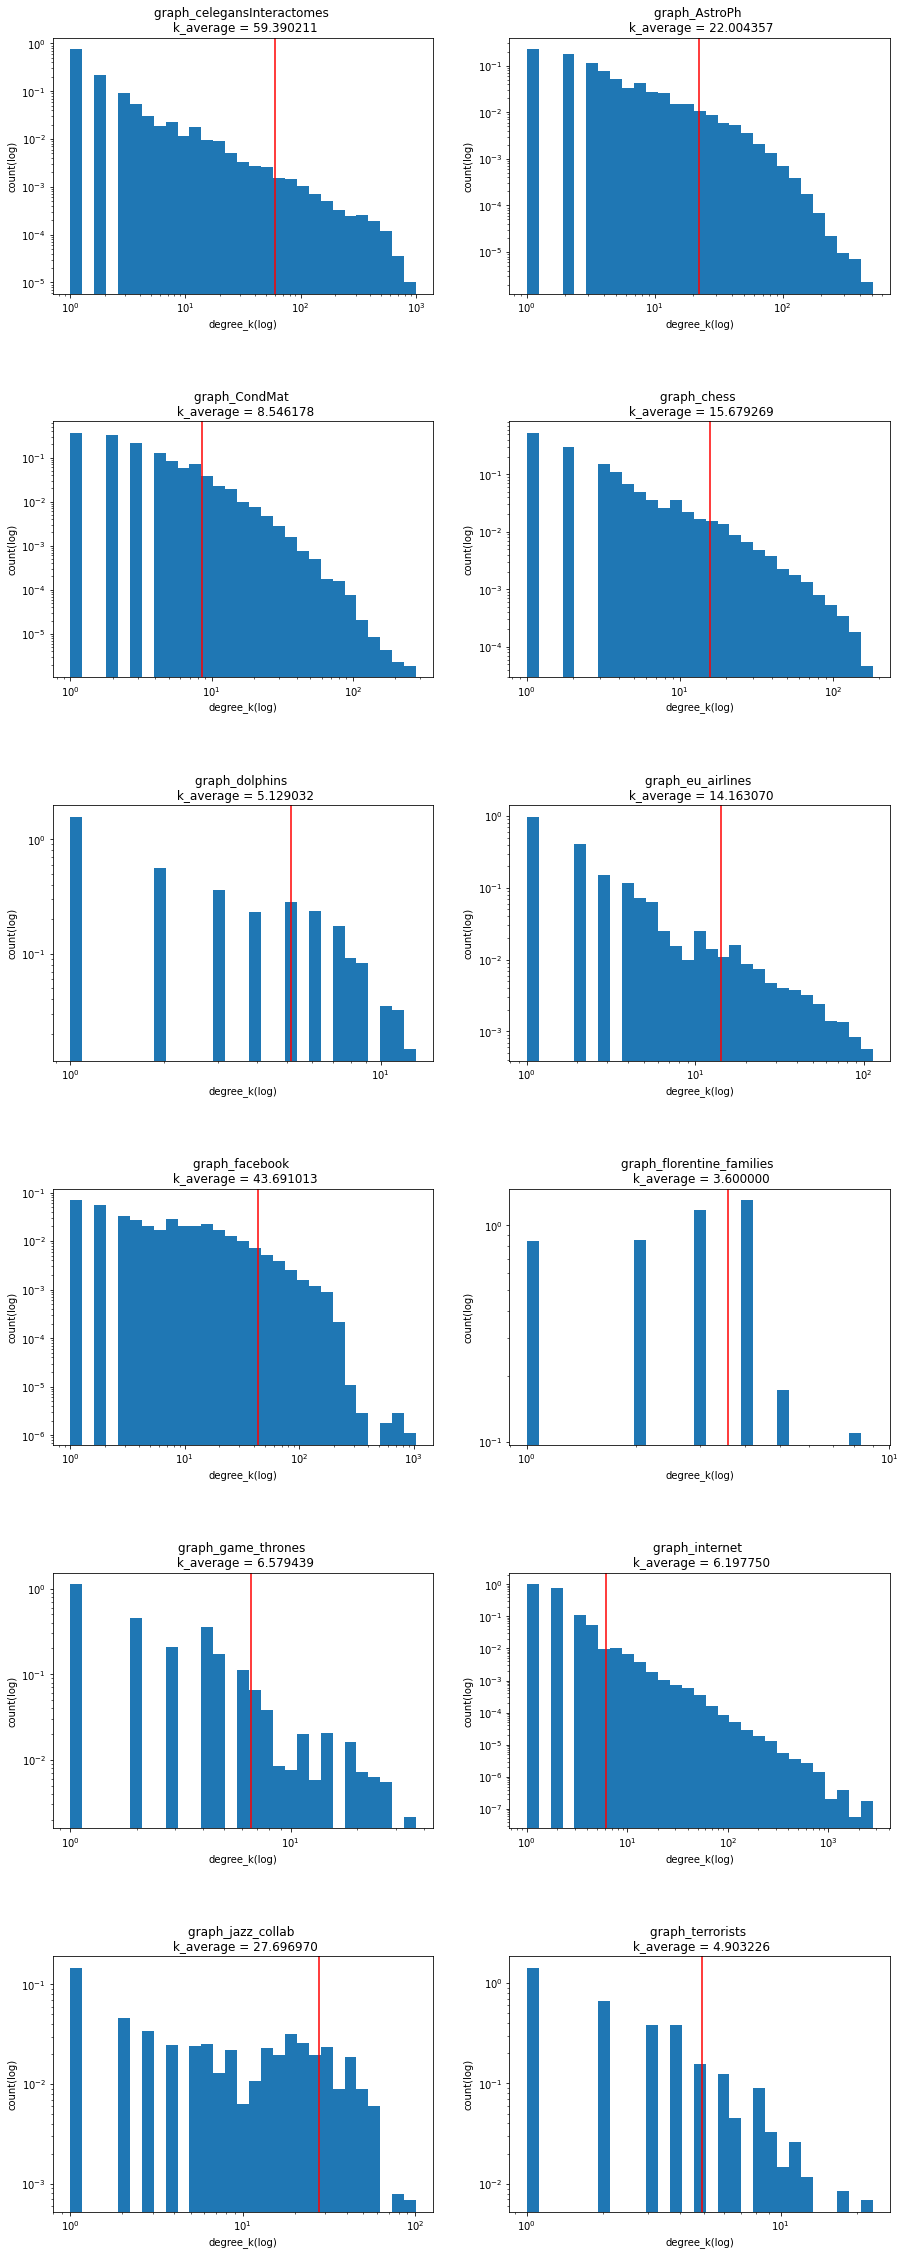

In [5]:
fig, axs = plt.subplots(6, 2, figsize=(15,40))

k = 0

for i in range(6):
    for j in range(2):
        g_degrees = real_g[k].degree()
        g_k_list = [g_degrees[i] for i in real_g[k].nodes()]

        # Find the properties of the network.
        num_g_nodes = len(real_g[k].nodes())
        sum_g_k = np.sum(g_k_list) 

        avg_g_k = sum_g_k / num_g_nodes

        result = find_bin_arg.log(real_g[k], 2)
        g_bins = result[0]

        axs[i,j].hist(g_k_list, bins=g_bins, density = True)
        axs[i,j].axvline(x=avg_g_k, c='r', label = 'k_average')

        name = g_name[k]
        axs[i,j].set_title('%s \n k_average = %f' %(name, avg_g_k))

        k += 1

for ax in axs.flat:
    ax.set(xlabel='degree_k(log)', ylabel='count(log)', xscale = 'log', yscale = 'log')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        

### 2. For each node, compute the clustering coefficient in the graphs *G*(denoted by *C(i)*) and *Grnd* (denoted as *Crnd(i)*)

&

### 3. Do a scatter plot of *C(i)* vs. *Crnd(i)*

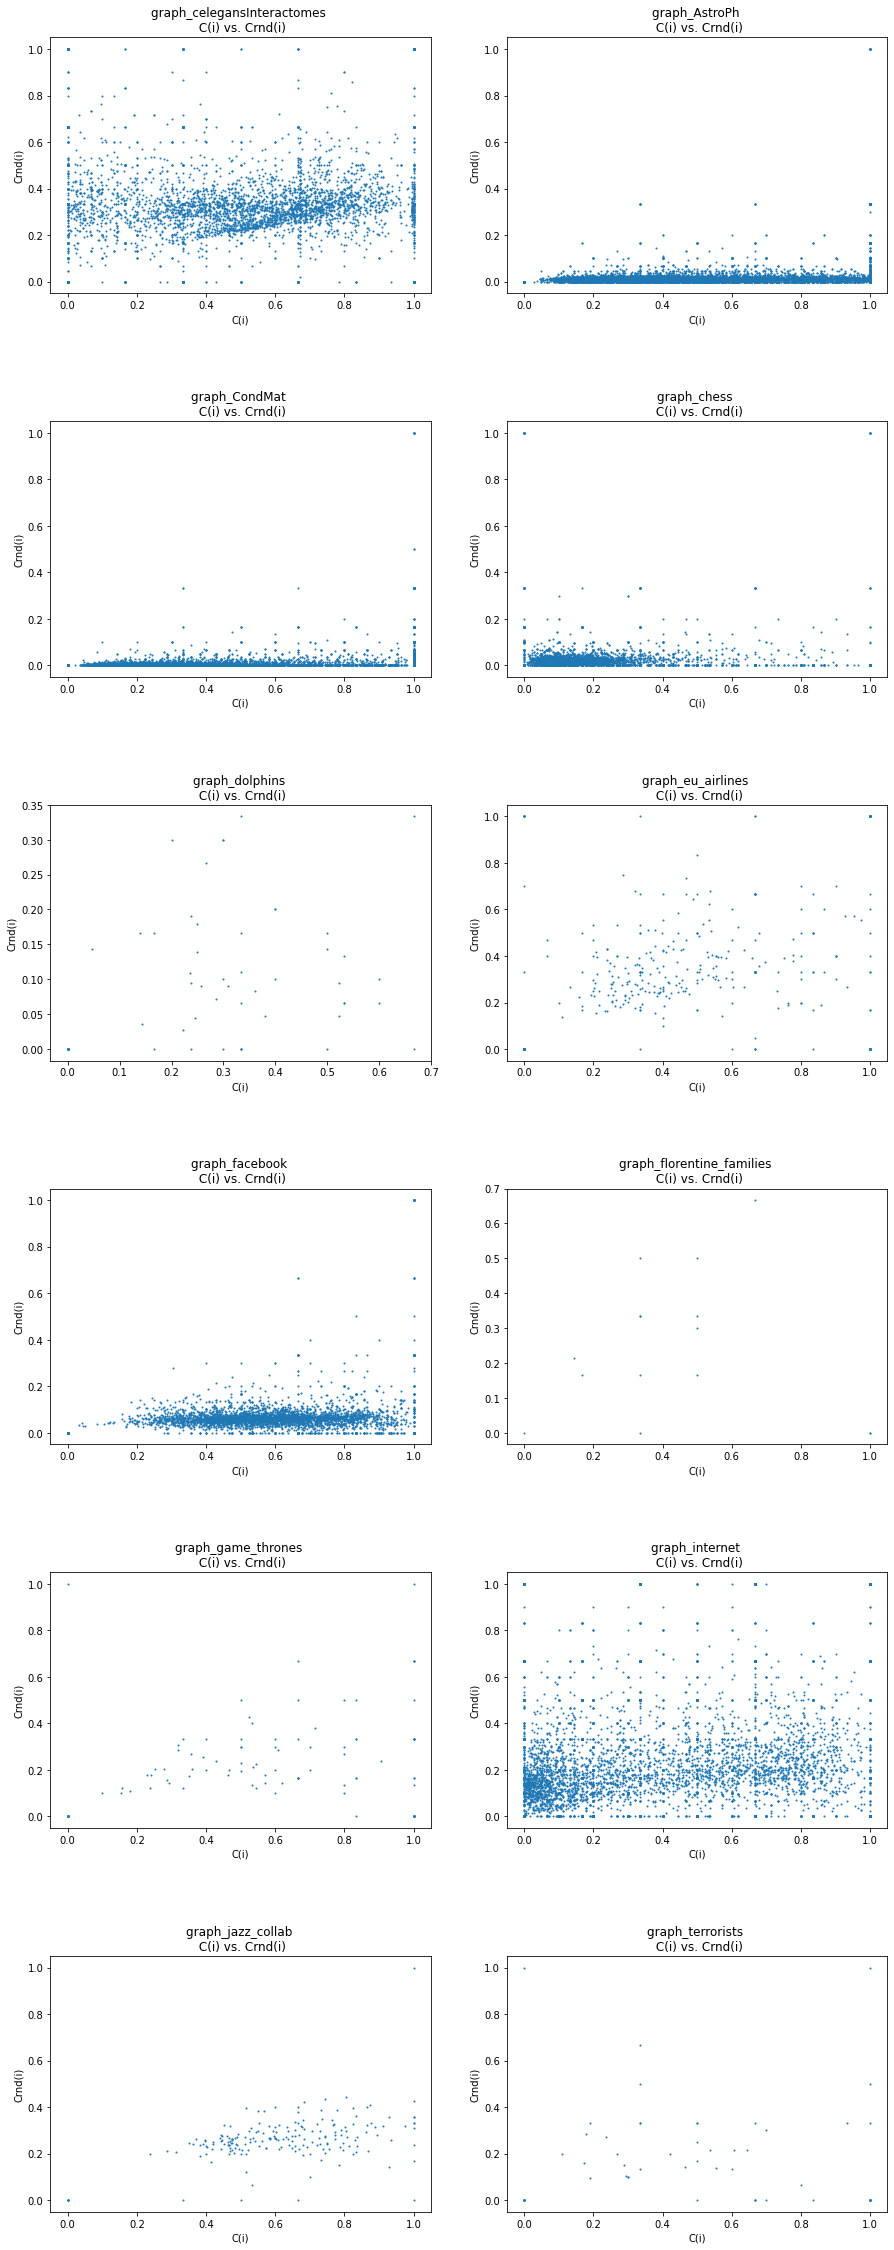

In [6]:
fig, axs = plt.subplots(6, 2, figsize=(15,40))

k = 0

for i in range(6):
    for j in range(2):
        ci_g_ff = nx.algorithms.cluster.clustering(real_g[k])
        cri_g_ff = nx.algorithms.cluster.clustering(rdm_g[k])

        ci = list(ci_g_ff.values())
        cri = list(cri_g_ff.values())

        axs[i,j].scatter(ci, cri, s=1)
        
        name = g_name[k]
        
        axs[i,j].set_title('%s \n C(i) vs. Crnd(i)' %(name))
        
        k += 1

for ax in axs.flat:
    ax.set(xlabel='C(i)', ylabel='Crnd(i)')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

